# What does a 0.02, 0.04, 0.12 distance in Q activation look like?


via wikipedia: https://en.wikipedia.org/wiki/LMS_color_space#XYZ_to_LMS

In [16]:
import numpy as np
from numpy.linalg import inv

In [4]:
XYZ_TO_LMS = np.array([
    [0.38971, 0.68898, -0.07868],
    [-0.22981, 1.18340, 0.0461],
    [0, 0, 1]
])

In [5]:
XYZ_TO_RGB = np.array([
    [0.8951, 0.2664, -0.1614],
    [-0.7502, 1.7135, 0.0367],
    [0.0389, -0.0685, 1.0296]
])

In [6]:
lms1 = np.array([0.7882, 0.6189, 0.6248])

In [25]:
lms2 = np.array([0.7882, 0.6189 - 0.02, 0.6248])

In [26]:
rgb1 = XYZ_TO_RGB @ inv(XYZ_TO_LMS) @ lms1

In [27]:
rgb1

array([0.92510683, 0.48359712, 0.63328215])

In [28]:
rgb2 = XYZ_TO_RGB @ inv(XYZ_TO_LMS) @ lms2

In [29]:
rgb2

array([0.94166447, 0.44535312, 0.63500918])

In [33]:
LMS_TO_RGB = XYZ_TO_RGB @ inv(XYZ_TO_LMS)

In [30]:
import matplotlib.pyplot as plt

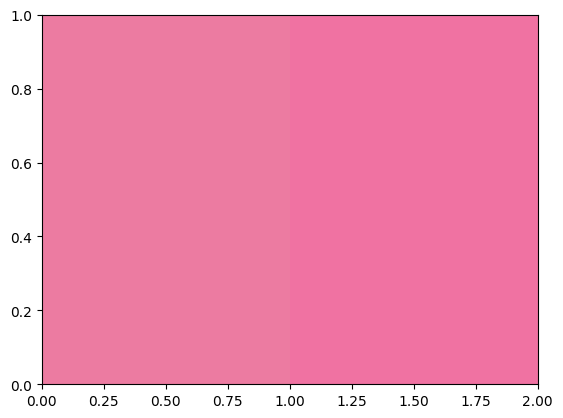

In [31]:
fig, ax = plt.subplots()
ax.set_xlim([0, 2])
rect = plt.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='none', facecolor=rgb1)
ax.add_patch(rect)
rect2 = plt.Rectangle((1,0), 1, 1, linewidth=1, edgecolor='none', facecolor=rgb2)
ax.add_patch(rect2)

plt.show()

In [36]:
olo = np.array([0, 1, 0])

In [34]:
[0,1,0] + np.array([2,4,5])

array([2, 5, 5])

In [80]:
pairs001 = [(LMS_TO_RGB @ rgb, LMS_TO_RGB @ (rgb - 0.01 * olo)) for rgb in [
    [0.5, 0.5, 0.7],
    [0.75, 0.65, 0.55]
]]

In [75]:
pairs002 = [(LMS_TO_RGB @ rgb, LMS_TO_RGB @ (rgb - 0.02 * olo)) for rgb in [
    [0.5, 0.5, 0.7],
    [0.75, 0.65, 0.55]
]]

In [76]:
pairs

[(array([0.50372644, 0.4774619 , 0.70747197]),
  array([0.52028408, 0.43921791, 0.70919901])),
 (array([0.82884335, 0.58206906, 0.55112914]),
  array([0.84540099, 0.54382506, 0.55285618]))]

In [77]:
pairs004 = [(LMS_TO_RGB @ rgb, LMS_TO_RGB @ (rgb - 0.04 * olo)) for rgb in [
    [0.5, 0.5, 0.7],
    [0.75, 0.65, 0.55]
]]

In [78]:
pairs004

[(array([0.50372644, 0.4774619 , 0.70747197]),
  array([0.53684172, 0.40097391, 0.71092604])),
 (array([0.82884335, 0.58206906, 0.55112914]),
  array([0.86195863, 0.50558107, 0.55458321]))]

In [72]:
def show_confusions(pairs, save=False):
    fig, ax = plt.subplots()

    ax.set_xlim([0, 2])
    ax.set_ylim([0, len(pairs)])

    ax.axis('off')

    for i, (a,b) in enumerate(pairs):
    
        rect_a = plt.Rectangle((0, i), 1, 1, linewidth=1, edgecolor='none', facecolor=a)
        rect_b = plt.Rectangle((1, i), 1, 1, linewidth=1, edgecolor='none', facecolor=b)

        ax.add_patch(rect_a)
        ax.add_patch(rect_b)
    if save:
        fig.savefig(f"{save}.png")
    plt.show()
    

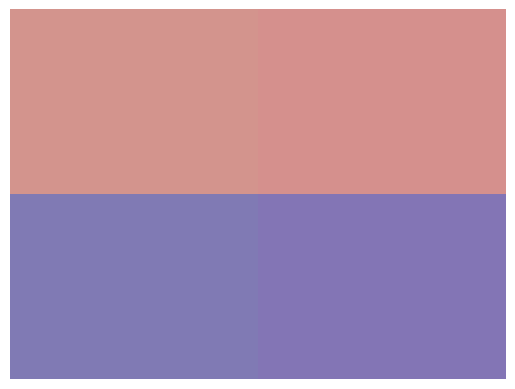

In [81]:
show_confusions(pairs001, save="difference0.01")

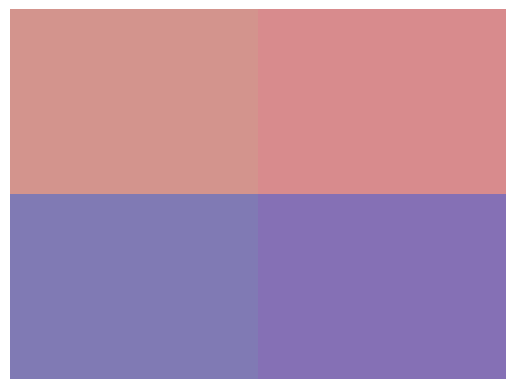

In [74]:
show_confusions(pairs002, save="difference0.02")

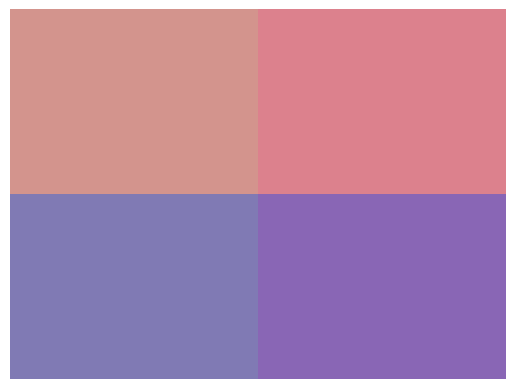

In [79]:
show_confusions(pairs004, save="difference0.04")

In [82]:
pairs012 = [(LMS_TO_RGB @ rgb, LMS_TO_RGB @ (rgb - 0.12 * olo)) for rgb in [
    [0.5, 0.5, 0.7],
    [0.75, 0.65, 0.55]
]]

In [83]:
pairs012

[(array([0.50372644, 0.4774619 , 0.70747197]),
  array([0.60307228, 0.24799793, 0.71783419])),
 (array([0.82884335, 0.58206906, 0.55112914]),
  array([0.9281892 , 0.35260508, 0.56149136]))]

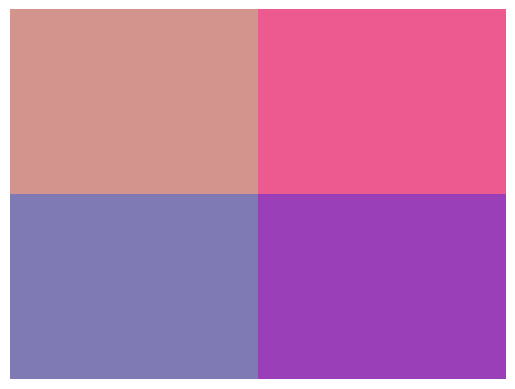

In [84]:
show_confusions(pairs012, save="difference0.12")